In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# samples like: 5/1∗1+4+3+2/9/4∗2/45/1∗1+4+3+2/9/4∗2/4 1 2 3 4 5 6 7 8 9 10 1 2 3 4 5 6 7 8

In [5]:
seq = '5/1∗1+4+3+2/9/4∗2/4'
syn_dis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8]
seq_len = len(seq)
seq_len

19

In [109]:
a = {i:[] for i in range(seq_len)}
window_size = 5
i = 0
nc = 0
nt = 0
with open('feval-analy_d10-alstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'a' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            continue
        
        vec = [0] * seq_len
        atten = line_json['a']
        vec[i+1-len(atten):i+1] = atten
        a[i].append(vec)
        i += 1
        i %= seq_len

In [110]:
nc/nt

0.8461538461538461

In [111]:
a_temp = {i:[] for i in range(seq_len)}
for i in range(seq_len):
    a_temp[i] = np.array(a[i]).sum(0)/len(a[i])

In [113]:
attens = np.array([a_temp[i] for i in range(seq_len)])

Text(0.5,0,'input')

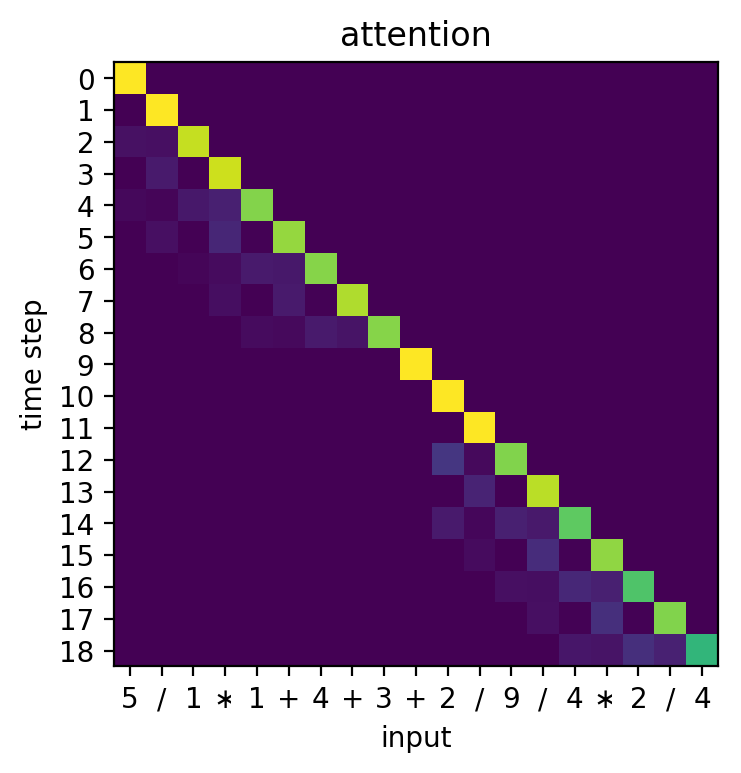

In [141]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.title('attention')
plt.imshow(attens)
plt.xticks(np.arange(seq_len), list(seq))
plt.ylabel('time step')
plt.yticks(np.arange(0, seq_len, 1))
plt.xlabel('input')

# whether the policy is stable

In [124]:
a = {i:[] for i in range(seq_len)}
window_size = 5
i = 0
nc = 0
nt = 0
with open('feval-analy_d10-alstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'a' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            continue
        
        vec = [0] * seq_len
        atten = line_json['a']
        vec[i+1-len(atten):i+1] = atten
        a[i].append(vec)
        i += 1
        i %= seq_len

In [142]:
def draw_sample(idx):
    a_temp = {i:[] for i in range(seq_len)}
    for i in range(seq_len):
        a_temp[i] = np.array(a[i][idx:idx+1]).sum(0)/len(a[i][idx:idx+1])
    attens = np.array([a_temp[i] for i in range(seq_len)])
    fig, ax = plt.subplots()
    fig.dpi = 200
    plt.title('attention')
    plt.imshow(attens)
    plt.xticks(np.arange(seq_len), list(seq))
    plt.ylabel('time step')
    plt.yticks(np.arange(0, seq_len, 1))
    plt.xlabel('input')

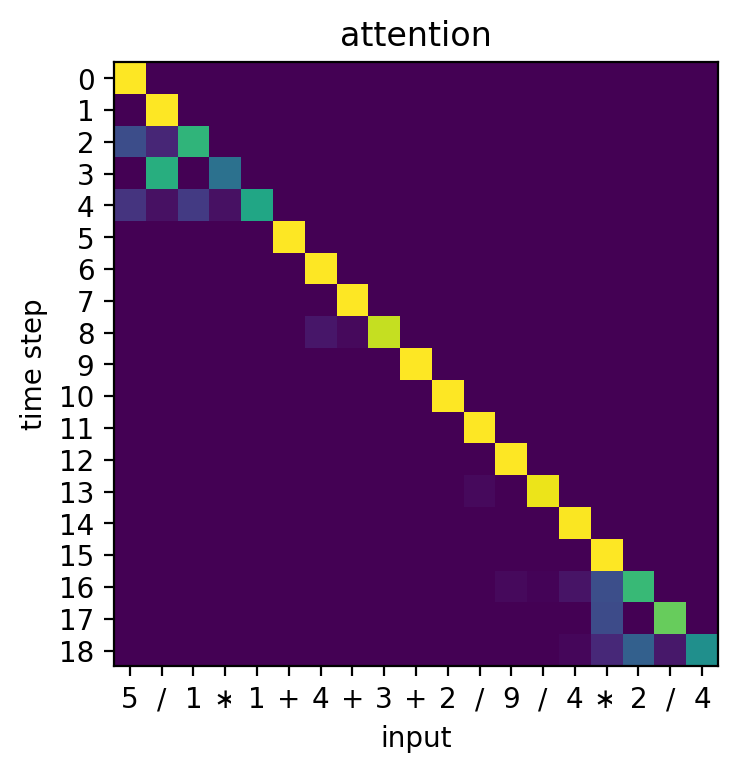

In [143]:
draw_sample(0)

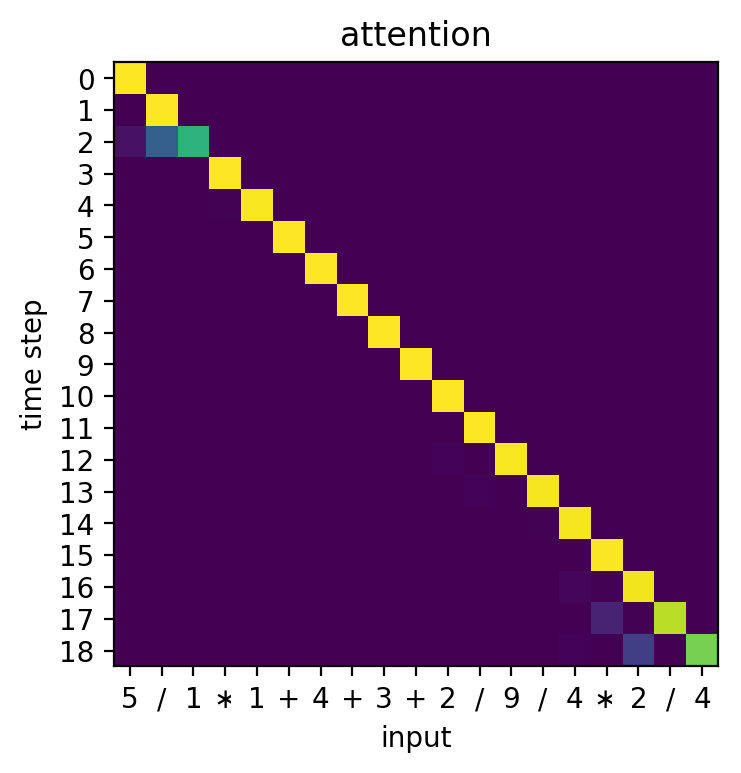

In [144]:
draw_sample(1)

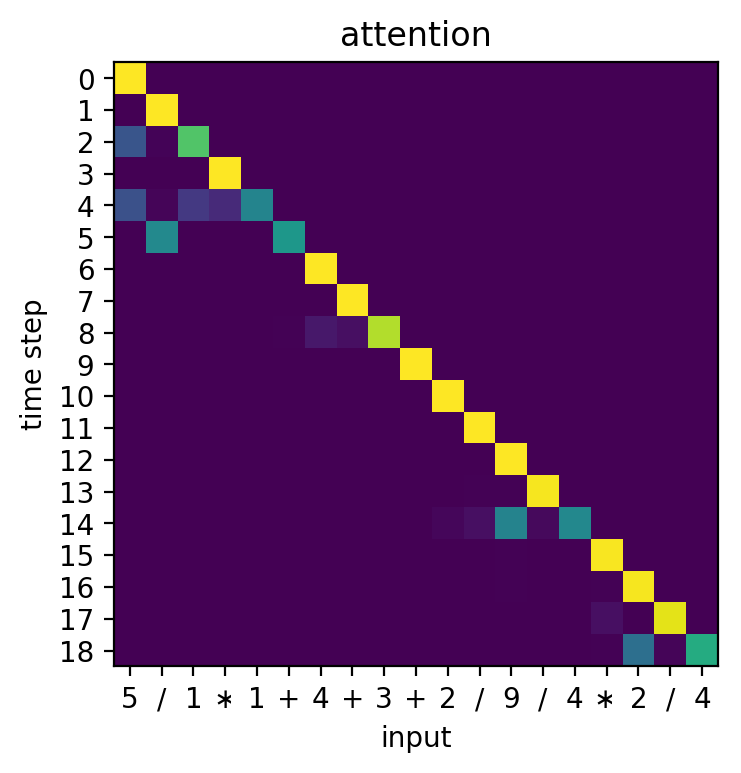

In [145]:
draw_sample(2)

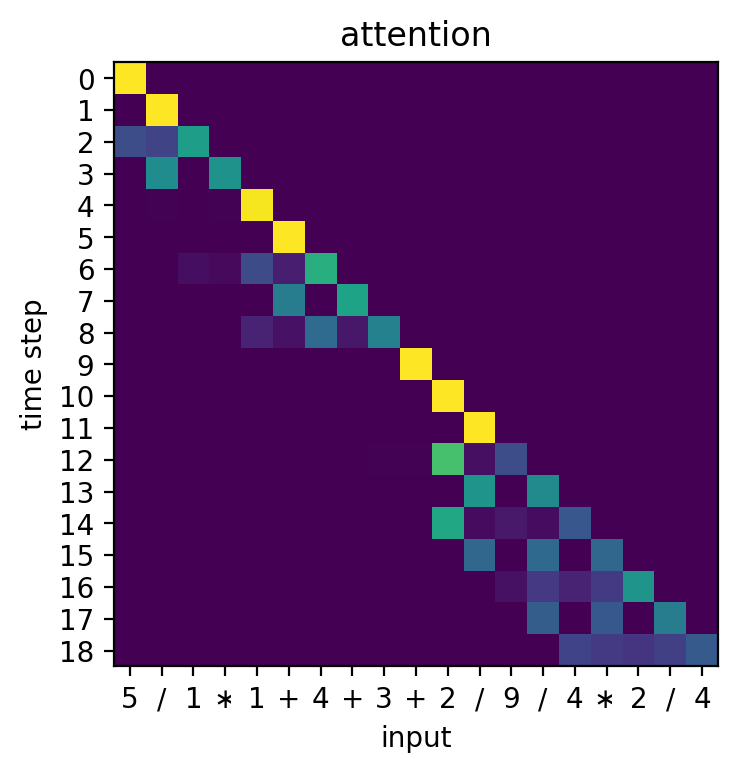

In [146]:
draw_sample(20)

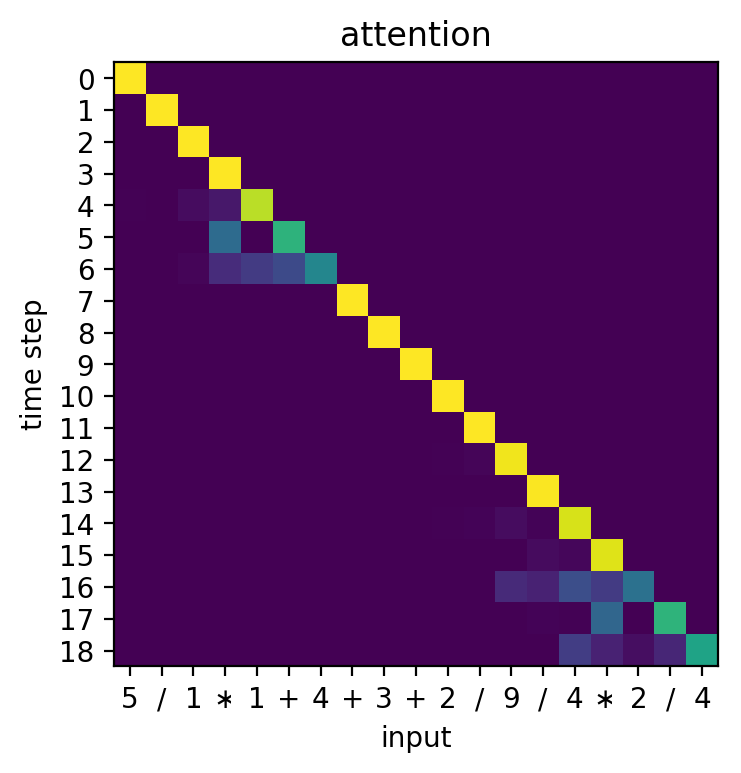

In [147]:
draw_sample(30)

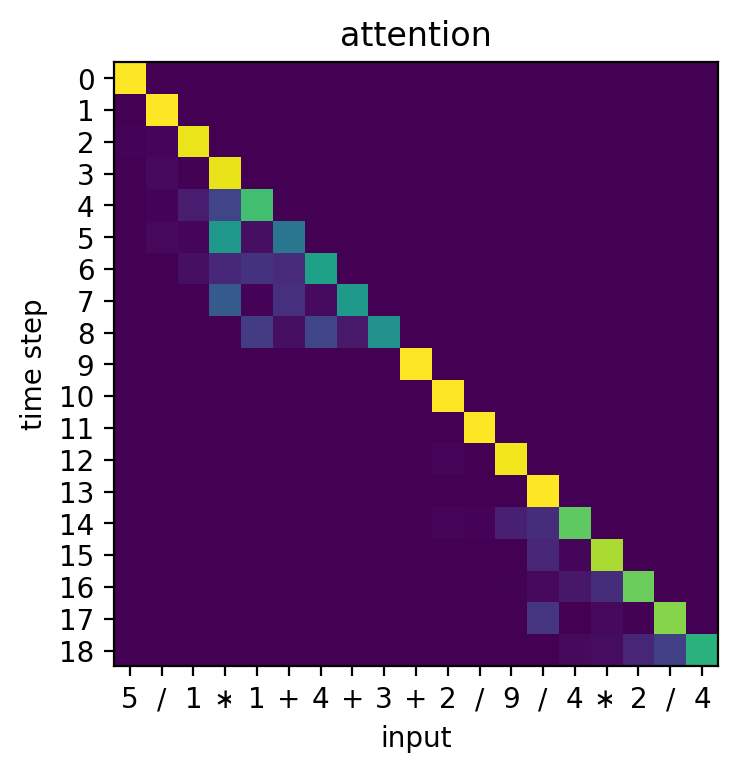

In [148]:
draw_sample(40)

# l/r : fraction of gates that are left/right saturated

In [134]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0

In [135]:
i = 0
with open('feval-analy_d10-alstm_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [136]:
ngates = ngates/seq_len
ngates

6500.0

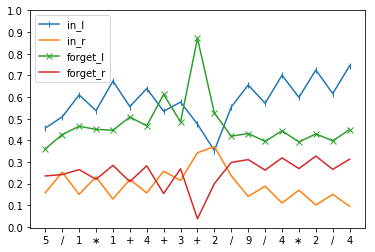

In [137]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

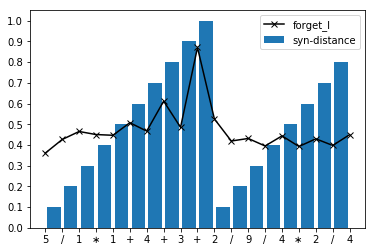

In [138]:
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x', color='black')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()